In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Loading data set
df = pd.read_csv('/content/drive/MyDrive/DataSets/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
#Checking for missing values
missing_values = df.isnull().sum()
missing_values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Separate features (X) and target (y)
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values

#Function for train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    #Shuffle the indices
    np.random.shuffle(indices)

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [ ]:
#Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3, random_seed=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


In [ ]:
#Function to compute Euclidean distance
def euclidean_distance(point1, point2):
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same shape")
  distance =  np.sqrt(np.sum((point1 - point2) ** 2))
  return distance

In [ ]:
#Function for KNN prediction for a single query
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    predictions =np.bincount(nearest_labels).argmax()
    return predictions

In [ ]:
#Function for KNN prediction for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

In [ ]:
#Function to compute accuracy
def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = (correct_predictions / len(y_true)) * 100
    return accuracy

In [ ]:
#Function to test KNN on different cvalues of k and plot the accuracies
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    accuracies = {}

    for k in k_values:
        predictions = knn_predict(X_test, X_train, y_train, k=k)
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy

        print(f"Accuracy for k={k}: {accuracy:.2f}%")

    # Plot results
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show()

    return accuracies

In [ ]:
#Perform k-NN and compute accuracy
k = 3
predictions = knn_predict(X_test, X_train, y_train, k=k)
accuracy = compute_accuracy(y_test, predictions)
print(f"Accuracy of k-NN (k={k}): {accuracy:.2f}%")


Accuracy of k-NN (k=3): 67.39%


In [ ]:
#Experiment with scaled data (without StandardScaler)
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split_scratch(X_scaled, y, test_size=0.3)

predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k=k)
accuracy_scaled = compute_accuracy(y_test_scaled, predictions_scaled)
print(f"Accuracy of k-NN with scaling (k={k}): {accuracy_scaled:.2f}%")

Accuracy of k-NN with scaling (k=3): 69.13%


Accuracy for k=1: 68.70%
Accuracy for k=2: 72.61%
Accuracy for k=3: 67.39%
Accuracy for k=4: 72.17%
Accuracy for k=5: 68.70%
Accuracy for k=6: 70.00%
Accuracy for k=7: 69.13%
Accuracy for k=8: 71.30%
Accuracy for k=9: 70.00%
Accuracy for k=10: 71.74%
Accuracy for k=11: 73.04%
Accuracy for k=12: 73.91%
Accuracy for k=13: 74.35%
Accuracy for k=14: 72.61%
Accuracy for k=15: 73.91%


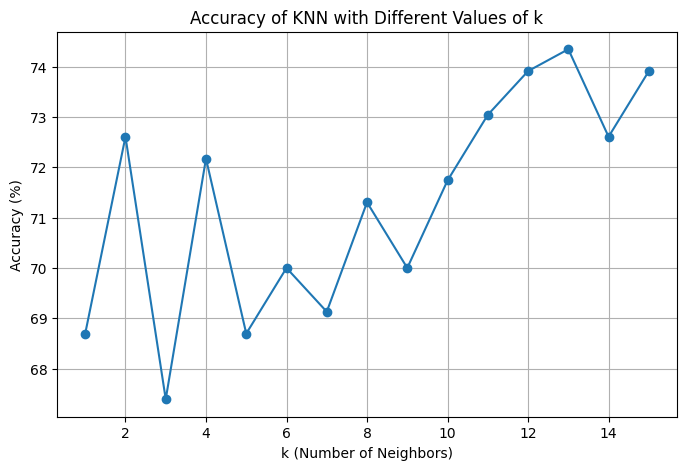

{1: 68.69565217391305,
 2: 72.60869565217392,
 3: 67.3913043478261,
 4: 72.17391304347827,
 5: 68.69565217391305,
 6: 70.0,
 7: 69.1304347826087,
 8: 71.30434782608695,
 9: 70.0,
 10: 71.73913043478261,
 11: 73.04347826086956,
 12: 73.91304347826086,
 13: 74.34782608695653,
 14: 72.60869565217392,
 15: 73.91304347826086}

In [ ]:
#Experiment with different k values
k_values = range(1, 16)
experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)

Experimenting with scaled data and varying k values...
Accuracy for k=1: 67.39%
Accuracy for k=2: 67.83%
Accuracy for k=3: 69.13%
Accuracy for k=4: 69.57%
Accuracy for k=5: 67.83%
Accuracy for k=6: 66.52%
Accuracy for k=7: 71.30%
Accuracy for k=8: 69.57%
Accuracy for k=9: 72.17%
Accuracy for k=10: 70.43%
Accuracy for k=11: 70.00%
Accuracy for k=12: 68.70%
Accuracy for k=13: 69.13%
Accuracy for k=14: 68.70%
Accuracy for k=15: 70.87%


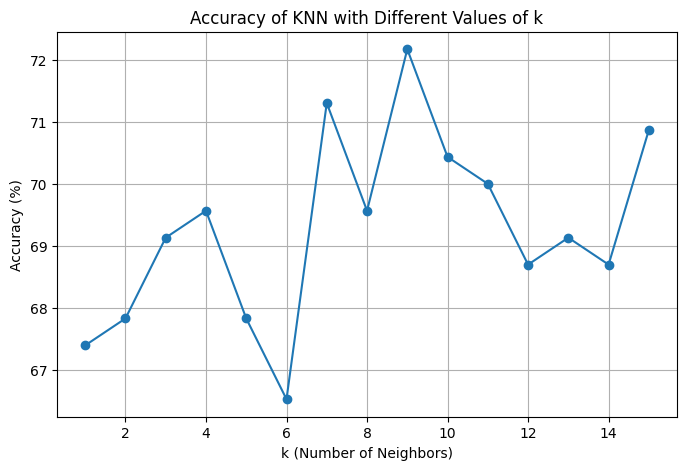

{1: 67.3913043478261,
 2: 67.82608695652173,
 3: 69.1304347826087,
 4: 69.56521739130434,
 5: 67.82608695652173,
 6: 66.52173913043478,
 7: 71.30434782608695,
 8: 69.56521739130434,
 9: 72.17391304347827,
 10: 70.43478260869566,
 11: 70.0,
 12: 68.69565217391305,
 13: 69.1304347826087,
 14: 68.69565217391305,
 15: 70.86956521739131}

In [ ]:
#Experiment with scaling and varying k values
print("Experimenting with scaled data and varying k values...")
experiment_knn_k_values(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, k_values)
